In [1]:
from __future__ import print_function, division
import os
from os.path import join as pjoin
HOME = os.environ['HOME']

In [2]:
dbfile = dbname

In [3]:
import blaze as bz
p4data = bz.Data('hdfstore://'+dbfile+'::df')

In [4]:
%matplotlib nbagg

In [5]:
image_names = p4data.image_name.distinct()

In [6]:
res = p4.get_data.ResultManager('PSP_003092_0985')

In [7]:
res.load_dataframes()

In [8]:
res.blotches.columns

Index(['angle', 'image_id', 'n_members', 'radius_1', 'radius_2', 'x', 'y'], dtype='object')

In [9]:
imgdata = p4data[p4data.image_name=='PSP_003092_0985']

In [10]:
from odo import odo

In [11]:
df = odo(imgdata, pd.DataFrame)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34169 entries, 9497790 to 12664868
Data columns (total 21 columns):
classification_id    34169 non-null object
created_at           34169 non-null datetime64[ns]
image_id             34169 non-null object
image_name           34169 non-null object
image_url            34169 non-null object
user_name            34169 non-null object
marking              34169 non-null object
x_tile               34169 non-null int64
y_tile               34169 non-null int64
acquisition_date     34169 non-null datetime64[ns]
local_mars_time      34169 non-null object
x                    26765 non-null float64
y                    26765 non-null float64
image_x              26765 non-null float64
image_y              26765 non-null float64
radius_1             12253 non-null float64
radius_2             12253 non-null float64
distance             9017 non-null float64
angle                21270 non-null float64
spread               34012 non-null float64


In [13]:
df = df[['image_id','x_tile','y_tile']].drop_duplicates()

In [14]:
merged = res.blotches.merge(df, on='image_id')

In [15]:
merged.columns

Index(['angle', 'image_id', 'n_members', 'radius_1', 'radius_2', 'x', 'y', 'x_tile', 'y_tile'], dtype='object')

In [16]:
merged = merged.assign(hirise_x=lambda row: (row.x + 740*(row.x_tile-1)).round(),
                       hirise_y=lambda row: (row.y + 548*(row.y_tile-1)).round())

In [17]:
merged[merged.hirise_x ==merged.hirise_x.min()]

,angle,image_id,n_members,radius_1,radius_2,x,y,x_tile,y_tile,hirise_x,hirise_y
849,38.460807,APF0000zlc,7,18.759201,17.314426,2.214286,566.142857,1,29,2,15910


In [18]:
tofill = merged.groupby(['x_tile','y_tile']).size()

In [19]:
tofill = tofill.reset_index()

In [20]:
tofill.columns = ['x','y','data']

In [21]:
tofill.head()

,x,y,data
0,1,1,11
1,1,2,3
2,1,3,16
3,1,4,9
4,1,5,5


In [22]:
tofill.x = tofill.x - 1
tofill.y = tofill.y - 1

In [23]:
tofill = tofill.values

In [24]:
indices = tofill[:,:2]
imgdata = tofill[:, 2]

In [25]:
tofill.shape

(231, 3)

In [109]:
newimg = np.zeros((5, 82))

In [110]:
newimg[indices] = imgdata

ValueError: shape mismatch: value array of shape (231,) could not be broadcast to indexing result of shape (231,2,82)

ValueError: sequence too large; must be smaller than 32

In [37]:
for _, blotch in res.blotches.iterrows():
    for _, fan in res.fans.iterrows():
        if abs(blotch.x - fan.x) < 10 and abs(blotch.y - fan.y) < 10:
            print("inside 10")
            print("Blotch", blotch, "Fan", fan)

inside 10
Blotch angle          9.089206
image_id     APF00002ru
n_members            24
radius_1       17.82855
radius_2       14.12887
x              26.10417
y                203.75
Name: 15, dtype: object Fan angle          33.95566
distance       39.96254
image_id     APF00002ru
n_members             5
spread         62.87313
x                  20.2
y                 198.2
Name: 1, dtype: object
inside 10
Blotch angle          21.67099
image_id     APF00002rp
n_members            42
radius_1       23.40001
radius_2       18.57191
x              171.6214
y              253.1667
Name: 23, dtype: object Fan angle         0.4609275
distance       49.69845
image_id     APF00002rb
n_members             5
spread         62.36105
x                 168.6
y                 259.8
Name: 154, dtype: object
inside 10
Blotch angle         -3.653043
image_id     APF00002rp
n_members            13
radius_1       10.48299
radius_2       10.16993
x              197.8692
y              105.3077
Name:

KeyboardInterrupt: 

In [45]:
%matplotlib qt

In [35]:
def plot_image_id(i=0):
    imgid = res.blotches.image_id.unique().tolist()[i]
    
    # image 1
    p4 = markings.ImageID(imgid)
    fig = p4.show_subframe(aspect='equal')
    fig.get_axes()[0].set_title("Planet4 id {}".format(imgid))
    fig.savefig('plots/'+imgid+'_1.png', dpi=150)
    plt.close(fig)
    
    # image 2
    fig, ax = plt.subplots(figsize=markings.calc_4_3(8))
    p4.plot_fans(ax=ax)
    p4.plot_blotches(ax=ax)
    ax.set_title('Planet4 id {}, Original markings'.format(imgid))
    fig.savefig('plots/'+imgid+'_2.png', dpi=150)
    plt.close(fig)
    
    # image 3
    reduced_blotches = res.blotches[res.blotches.image_id==imgid]
    reduced_fans = res.fans[res.fans.image_id==imgid]
    fig, ax = plt.subplots(figsize=markings.calc_4_3(8))
    p4.plot_fans(ax=ax, fans=reduced_fans)
    p4.plot_blotches(ax=ax, blotches=reduced_blotches)
    ax.set_title('Planet4 id {}, Clustered markings'.format(imgid))
    fig.savefig('plots/'+imgid+'_3.png', dpi=150)
    plt.close(fig)
#     plt.show()

In [36]:
length = len(res.blotches.image_id.unique())
for i in range(length):
# for i in range(3):
    print(i*100/length,'%')
    plot_image_id(i)

0.0 %
0.4329004329004329 %
0.8658008658008658 %
1.2987012987012987 %
1.7316017316017316 %
2.1645021645021645 %
2.5974025974025974 %
3.0303030303030303 %
3.463203463203463 %
3.896103896103896 %
4.329004329004329 %
4.761904761904762 %
5.194805194805195 %
5.627705627705628 %
6.0606060606060606 %
6.4935064935064934 %
6.926406926406926 %
7.359307359307359 %
7.792207792207792 %
8.225108225108226 %
8.658008658008658 %
9.090909090909092 %
9.523809523809524 %
9.956709956709958 %
10.38961038961039 %
10.822510822510823 %
11.255411255411255 %
11.688311688311689 %
12.121212121212121 %
12.554112554112555 %
12.987012987012987 %
13.41991341991342 %
13.852813852813853 %
14.285714285714286 %
14.718614718614718 %
15.151515151515152 %
15.584415584415584 %
16.017316017316016 %
16.450216450216452 %
16.883116883116884 %
17.316017316017316 %
17.748917748917748 %
18.181818181818183 %
18.614718614718615 %
19.047619047619047 %
19.48051948051948 %
19.913419913419915 %
20.346320346320347 %
20.77922077922078 %
21.2

In [39]:
from IPython.html.widgets import interact

<function __main__.plot_image_id>

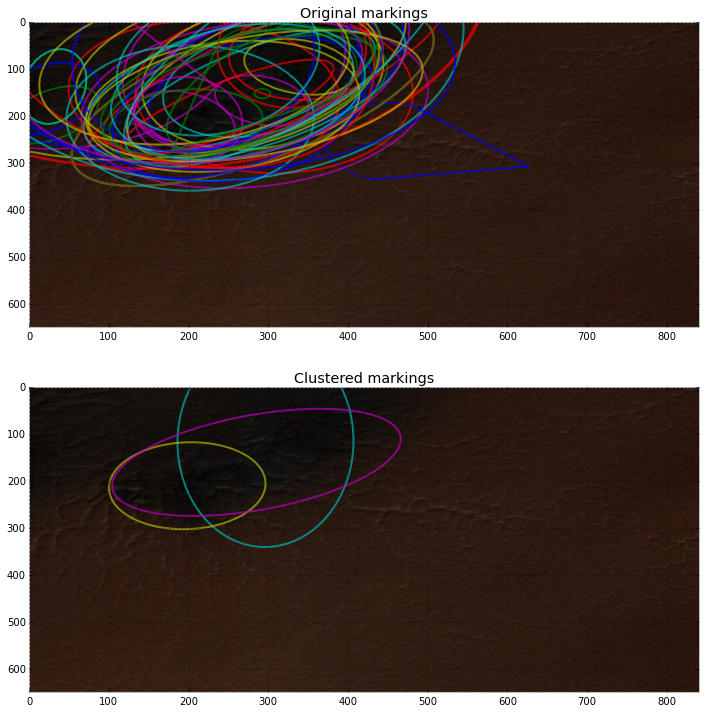

In [42]:
interact(plot_image_id, i=(0, len(res.blotches.image_id.unique().tolist())-1))

In [34]:
blotches = p4data[p4data.marking=='blotch']

In [35]:
ellipses_lt_180 = blotches[blotches.angle>180]

In [36]:
len(ellipses_lt_180)

73300